In [52]:
#add the Modules folder in your python PATH
import sys
#sys.path.remove("/home2/datahome/jgula/Python_Modules") #just for JG
sys.path.append("./Modules/") 

#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

#Some standard modules
import sys, os
import numpy as np
import time as tm
from netCDF4 import Dataset
import numpy.ma as ma

#Specific modules needed for pyticles
import pyticles_sig_sa as part
import pyticles_3d_sig_sa as partF

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#Simulations (path, data...)
from R_files import load
from R_netcdf import ionetcdf

In [55]:
ncfile = './case1/polgyr_case1_1_1000.nc' #the netcdf file containing particles data

fifig = './case1'
itime = 2

###############################

nc = Dataset(ncfile, 'r')
parameters = nc.simulation
base = nc.base

print nc.variables['px'].shape

px = nc.variables['px'][itime,:]
py = nc.variables['py'][itime,:]
pz = nc.variables['pz'][itime,:]

ptemp = nc.variables['pt'][itime,:]
psalt = nc.variables['ps'][itime,:]

plon = nc.variables['plon'][itime,:]
plat = nc.variables['plat'][itime,:]
pdepth = nc.variables['pdepth'][itime,:]
ptopo = nc.variables['ptopo'][itime,:]

nc.close()


(7, 10271)


In [56]:
ncfile = './case1/polgyr_case1_1_1000_offline.nc' #the netcdf file containing particles data

fifig = './case1'
itime = 2

###############################

nc = Dataset(ncfile, 'r')
parameters = nc.simulation
base = nc.base

px2 = nc.variables['px'][itime,:]
py2 = nc.variables['py'][itime,:]
pz2 = nc.variables['pz'][itime,:]

ptemp2 = nc.variables['pt'][itime,:]
psalt2 = nc.variables['ps'][itime,:]

plon2 = nc.variables['plon'][itime,:]
plat2 = nc.variables['plat'][itime,:]
pdepth2 = nc.variables['pdepth'][itime,:]
ptopo2 = nc.variables['ptopo'][itime,:]

nc.close()



In [57]:
#############
print px[10], px2[10]
print py[10], py2[10]
print pz[10], pz2[10]
print ' '
print plon[10], plon2[10]
print plat[10], plat2[10]
print pdepth[10], pdepth2[10]
print ptopo[10], ptopo2[10]

simul.topo[1538,573]

1537.58869515 1537.58869515
572.588823182 572.588823182
79.99 79.99
 
-17.6948809881 -17.6948809881
48.4625319914 48.4625319914
-0.458808917402 -0.458808917402
4479.13446451 4479.13446451


4482.1021461940263

In [16]:
# Load simul
simul = load(simul = parameters)
depths = simul.coord[4]

args ([u'polgyr', u'[0,10000,0,10000,[1,100,1]]', u'1000'],)
args[0] [u'polgyr', u'[0,10000,0,10000,[1,100,1]]', u'1000']
len(args[0]) 3
time of simulation is: 1000
coord
loading /home/datawork-lops-osi/jgula/POLGYR/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01000.nc
get domain [0,10000,0,10000,[1,100,1]] [0,10
coordmax
loading /home/datawork-lops-osi/jgula/POLGYR/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01000.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
dt
dt is read in  /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.01000.nc
[0, 1602, 0, 2002, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])]
ncname0,ny

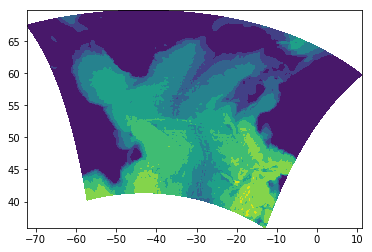

In [17]:
plt.contourf(simul.x, simul.y,simul.topo)

In [18]:
coord =simul.coord[:4];
[z_r,z_w] = part.get_depths(simul,coord=coord,x_periodic=x_periodic,y_periodic=y_periodic,ng=ng)

using NEW_S_COORD


In [21]:
pdepth = part.map_var(simul,z_w,px,py,pz,ng,coord=coord)
[plon,plat] = part.map_lonlat(simul,px,py,ng,coord=coord)
ptopo = part.map_topo(simul,px,py,ng,coord=coord)

pdepth[plon==0] = np.nan
plat[plon==0] = np.nan
plon[plon==0] = np.nan

##################################################################

[u,v,w]=part.get_vel_io(simul,pm=simul.pm,pn=simul.pn,coord=coord)


(2002, 1602, 81)
[2002, 1602, 80]
mean depth is -0.462708499015


In [ ]:
###################################################################################
# plot a vertical section showing topography and particles positions
# centered around px0,py0 along the x-axis
###################################################################################
ip=107
py0 = np.int(py[ip]) ; px0 =np.int(px[ip]); res=1.
nx1 = px0 - 45; nx2 = px0 + 45
ny1 = py0 - 45; ny2 = py0 + 45

plt.plot((px[np.abs(py-py0)<1.]-px0)*res,pdepth[np.abs(py-py0)<1.],'o')

plt.plot((np.arange(nx1,nx2)-px0)*res,5000*u[nx1:nx2,py0,-1]-25.,'--oy',lw=5.)
plt.plot((np.arange(nx1,nx2)-px0)*res,5000*u[nx1:nx2,py0+1,-1]-25.,'-oy',lw=5.)

plt.plot((np.arange(nx1,nx2)-px0)*res-0.5,-simul.topo[nx1:nx2,py0],'--or',lw=5.)
plt.plot((np.arange(nx1,nx2)-px0)*res-0.5,-simul.topo[nx1:nx2,py0+1],'-or',lw=5.)

#plt.plot((np.arange(nx1,nx2)-px0)*res,-part.rho2psi(simul.topo)[nx1:nx2,py0],'--k',lw=5.)
#plt.ylim([-100, 0])
#plt.xlim([-2, 2])
